In [13]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("dataset.csv")
df

,id,year,month,day,hour,minute,press,humid,temp,ws40,...,vertdisp140,vertdisp150,vertdisp160,vertdisp170,vertdisp180,vertdisp190,vertdisp200,vertdisp220,vertdisp240,vertdisp260
0,2021-09-16 18:00:00,2021,9,16,18,0,1012,78,27.6,7.44,...,0.44,0.44,0.44,0.45,0.46,0.49,0.51,0.54,0.56,0.62
1,2021-09-16 18:10:00.000004,2021,9,16,18,10,1012,78,27.5,7.45,...,0.48,0.50,0.51,0.53,0.54,0.54,0.52,0.51,0.47,0.47
2,2021-09-16 18:19:59.999999,2021,9,16,18,19,1012,78,27.5,7.59,...,0.33,0.35,0.37,0.38,0.39,0.39,0.38,0.37,0.35,0.36
3,2021-09-16 18:30:00.000003,2021,9,16,18,30,1012,79,27.5,7.64,...,0.47,0.46,0.47,0.48,0.50,0.54,0.56,0.55,0.54,0.53
4,2021-09-16 18:39:59.999998,2021,9,16,18,39,1012,79,27.4,9.06,...,0.38,0.38,0.36,0.35,0.35,0.35,0.35,0.31,0.34,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2021-11-08 13:49:59.999999,2021,11,8,13,49,1008,66,30.6,8.11,...,1.22,1.24,1.23,1.24,1.25,1.26,1.22,1.16,1.15,1.14
7557,2021-11-08 14:00:00.000003,2021,11,8,14,0,1007,66,30.8,8.38,...,1.14,1.23,1.32,1.38,1.41,1.42,1.43,1.42,1.43,1.43
7558,2021-11-08 14:09:59.999998,2021,11,8,14,9,1007,67,30.7,8.63,...,1.40,1.45,1.48,1.46,1.41,1.36,1.33,1.27,1.30,1.27
7559,2021-11-08 14:20:00.000002,2021,11,8,14,20,1007,67,30.4,8.75,...,1.22,1.25,1.25,1.23,1.23,1.24,1.22,1.18,1.20,1.19


C:\Users\lucas\AppData\Local\Temp\ipykernel_7884\4085528447.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = pd.to_datetime(df['id'], errors='ignore')
C:\Users\lucas\AppData\Local\Temp\ipykernel_7884\4085528447.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = df['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))


<Axes: xlabel='id'>

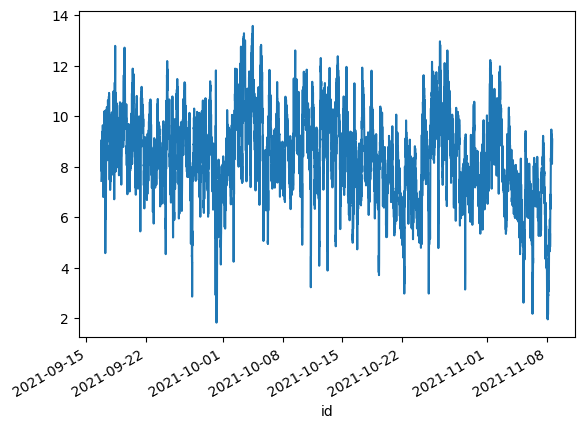

In [15]:
df.index = pd.to_datetime(df['id'], errors='ignore')
df.index = df['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))

df

temp = df['ws40']

temp.plot()

In [16]:
def df_to_X_y(df, window_size=36):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [17]:
X1, y1 = df_to_X_y(temp, 36)
X1.shape, y1.shape

((7525, 36, 1), (7525,))

In [18]:
X_train1, y_train1 = X1[:6500], y1[:6500]
X_val1, y_val1 = X1[6500:7100], y1[6500:7100]
X_test1, y_test1 = X1[7100:], y1[7100:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((6500, 36, 1), (6500,), (600, 36, 1), (600,), (425, 36, 1), (425,))

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((36, 1)))
model1.add(LSTM(128))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         1,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,601 (264.07 KB)

 Trainable params: 67,601 (264.07 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
cp1 = ModelCheckpoint('model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [21]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=15, callbacks=[cp1])

Epoch 1/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 52.3073 - root_mean_squared_error: 7.1882 - val_loss: 5.3403 - val_root_mean_squared_error: 2.3109
Epoch 2/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 5.1131 - root_mean_squared_error: 2.2469 - val_loss: 1.7979 - val_root_mean_squared_error: 1.3409
Epoch 3/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 1.8617 - root_mean_squared_error: 1.3630 - val_loss: 0.7843 - val_root_mean_squared_error: 0.8856
Epoch 4/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 1.0810 - root_mean_squared_error: 1.0395 - val_loss: 0.5856 - val_root_mean_squared_error: 0.7653
Epoch 5/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.8280 - root_mean_squared_error: 0.9098 - val_loss: 0.5087 - val_root_mean_squared_error: 0.7132
Epoch 6/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6883 - root_mean_squared_error: 0.8295 - val_loss: 0.4560 - val_root_mean_squared_error: 0.6753
Epoch 7/15
204/204 ━━━━━━━━━━━━━━━━━━━━ 7s 3

In [22]:
from tensorflow.keras.models import load_model
model1 = load_model('model1.keras')

In [23]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


,Train Predictions,Actuals
0,7.752323,8.48
1,8.074652,8.97
2,8.494144,8.87
3,8.672015,8.79
4,8.704411,8.36
...,...,...
6495,10.522518,9.64
6496,10.106337,9.79
6497,9.881281,10.26
6498,9.931934,11.38


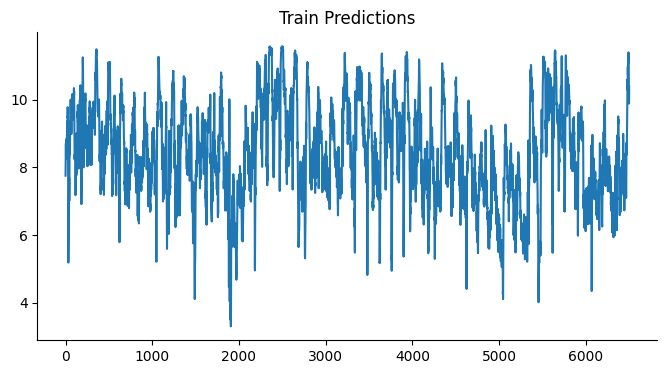

In [24]:
from matplotlib import pyplot as plt
train_results['Train Predictions'].plot(kind='line', figsize=(8, 4), title='Train Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

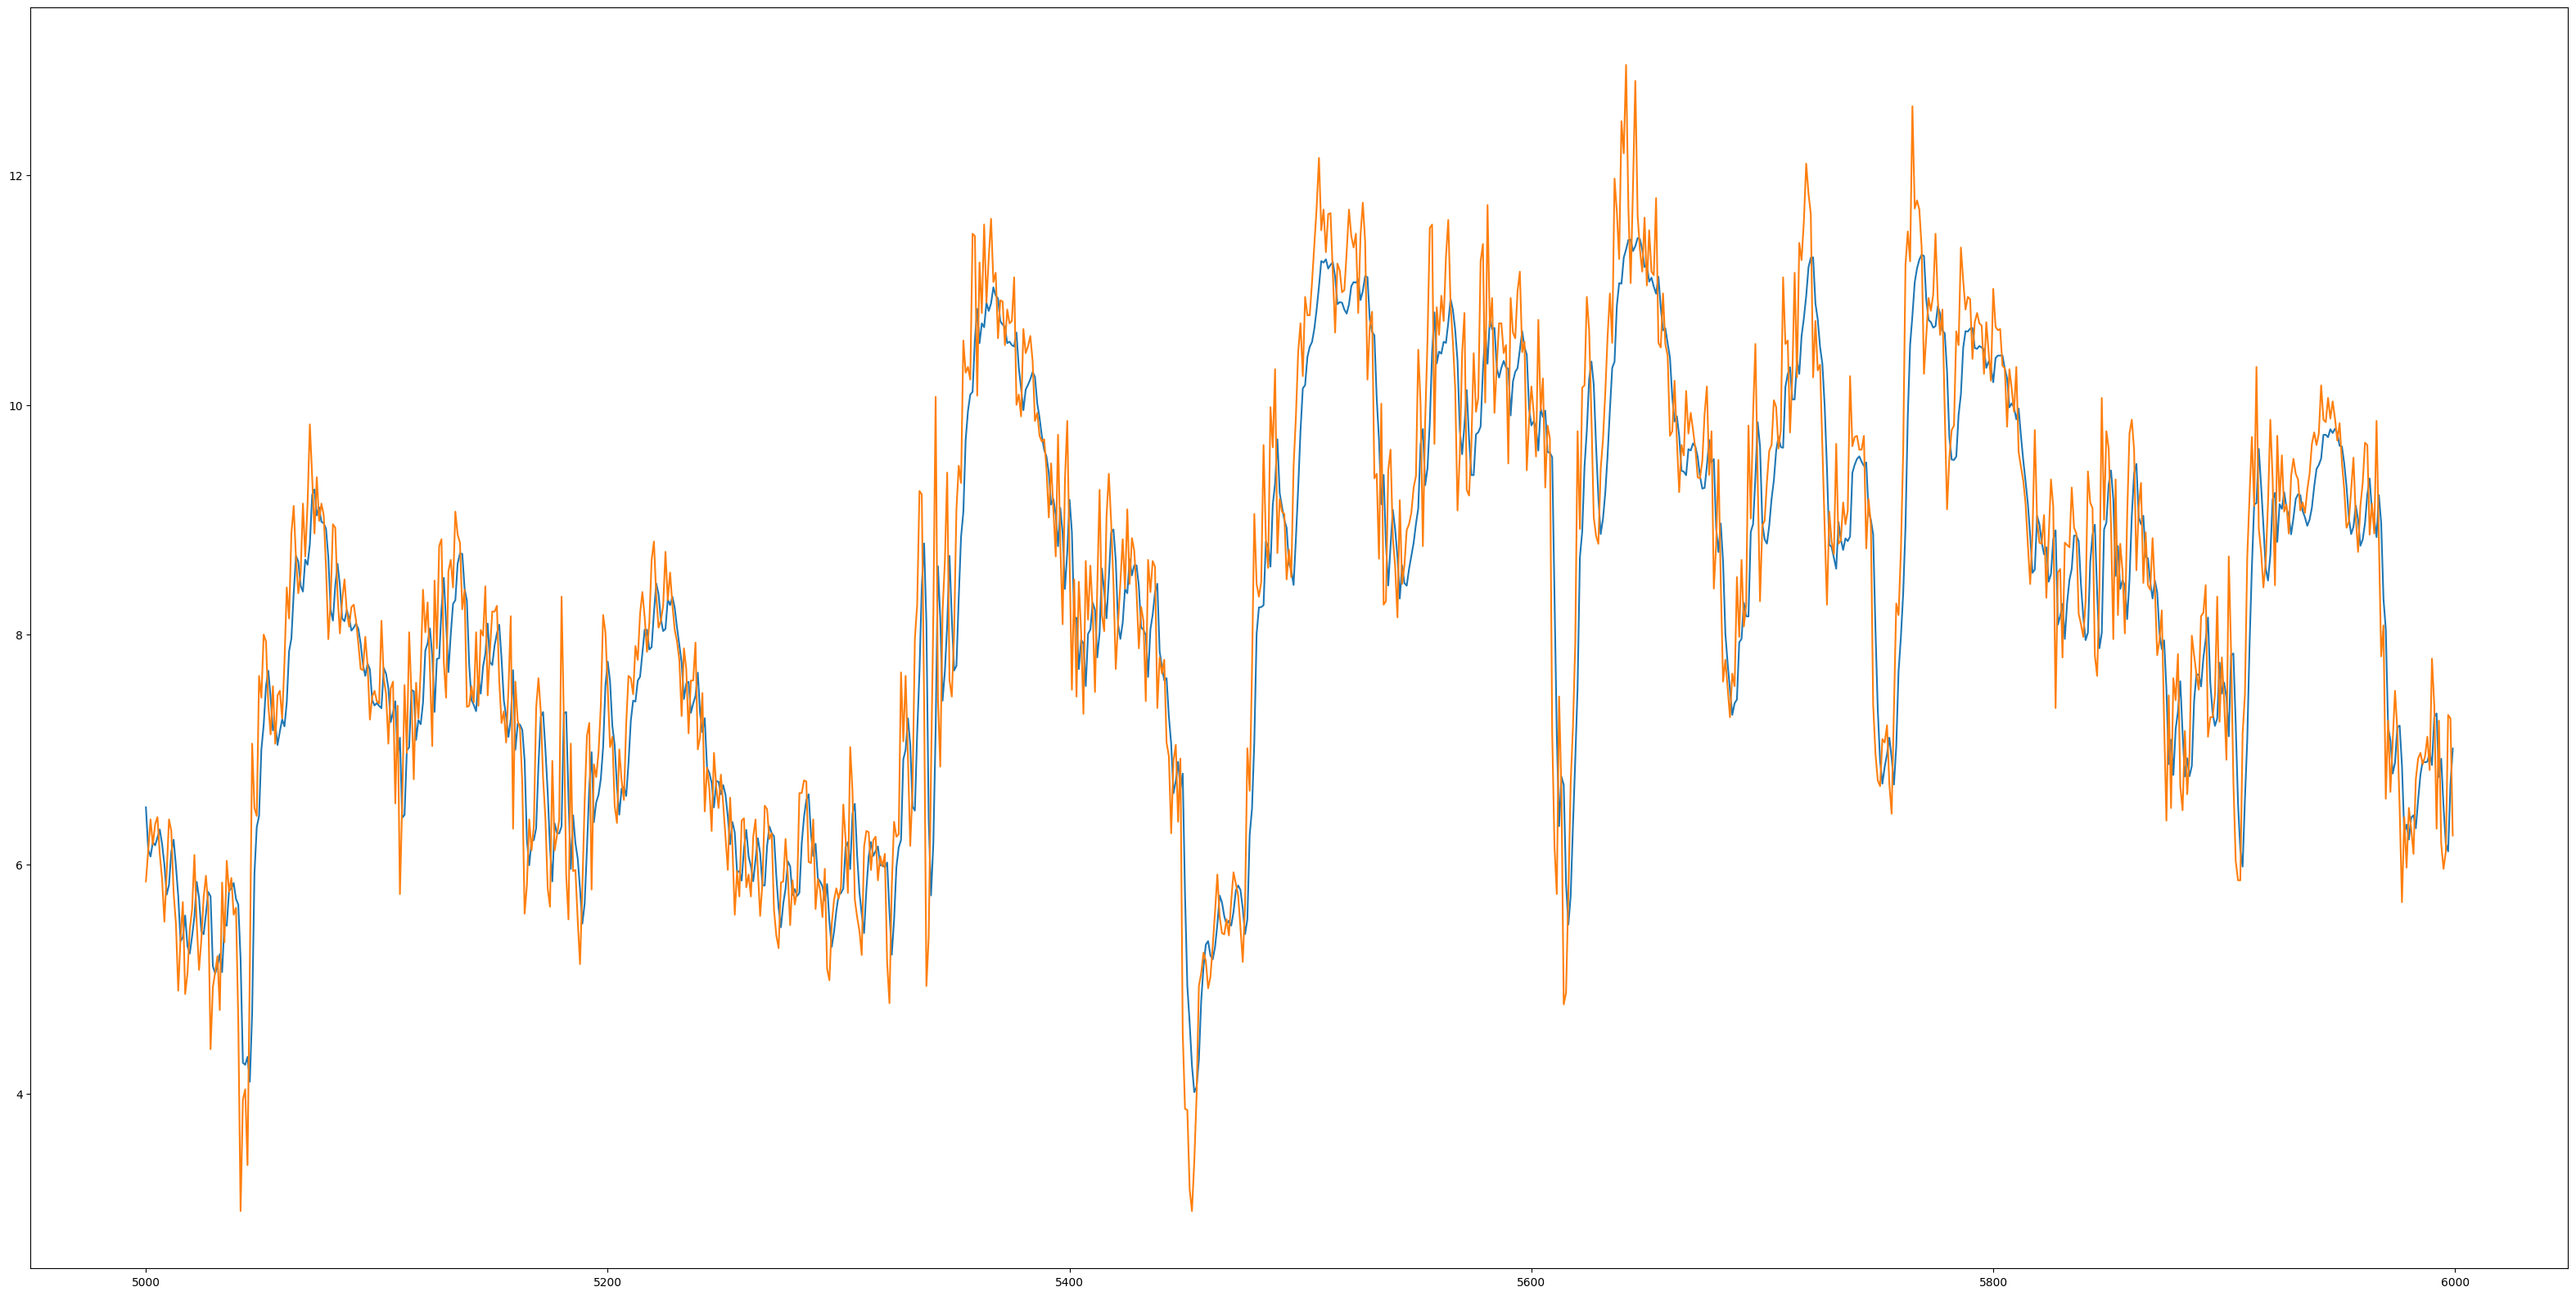

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
plt.plot(train_results['Train Predictions'][5000:6000])
plt.plot(train_results['Actuals'][5000:6000])


